In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Other Series.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,...,training_session,number_of_participant,training_field,training_name,cross_selling,upselling,sales_ID,sales_name,sales_email,sales_phone
0,0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,...,17,19,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...,S0001,Tasnim Fujiati,saragihalika@hotmail.com,+62 (914) 912-3957
1,1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,...,17,20,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...,S0002,"Jelita Irawan, S.Ked",agnessaputra@yahoo.com,(0711) 678 9718
2,2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,...,17,18,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...,S0003,Dr. Yulia Siregar,najmudinerik@hotmail.com,+62 (68) 864-9445
3,3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,...,17,18,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...,S0004,Indah Sihombing,vmarpaung@hotmail.com,+62 (087) 511-0540
4,4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,...,16,20,Other Series,Customer Service Excellence For Basic and Fron...,Information Security Awareness,Customer Service Excellence For Basic and Fron...,S0005,"Okta Purnawati, S.Farm",wasitacandra@hotmail.com,+62 (027) 997 6053


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0.1                                 5000 non-null   int64  
 1   Unnamed: 0                                   5000 non-null   int64  
 2   company_ID                                   5000 non-null   object 
 3   company_name                                 5000 non-null   object 
 4   company_pic                                  5000 non-null   object 
 5   company_address                              5000 non-null   object 
 6   company_phone                                5000 non-null   object 
 7   company_email                                5000 non-null   object 
 8   company_field                                5000 non-null   object 
 9   transaction_date                             5000 non-null   object 
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["upselling"], axis=1, inplace=True)

In [5]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

numeric_features = ["level_training_process", "possibility_of_purchasing_the_same_training", "training_session"]

categorical_features = ["group", "communication_channel", "complaints", "training_name", "communication_quality", "tren_mode_factor", "purchasing_time_patterns"]


drop_features = ["Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email", "company_field",
                 "transaction_date", "total_payment", "brand_sustainability", "rating_training",
                 "interest_in_discount_program", "training_ID", "training_price", "discount_training", "training_field",
                 "trainer_name", "sales_ID", "sales_name", "sales_email", "sales_phone"]


# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder="passthrough"
    )

In [6]:
X = df.drop("cross_selling", axis=1)
y = df["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pkl = joblib.load(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\modelling\classification\cross_selling\model_save\model8.pkl")
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("models", pkl)
])
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] Start training from score -2.103734
[LightGBM] [Info] Start training from score -2.087474
[LightGBM] [Info] Start training from score -2.065539
[LightGBM] [Info] Start training from score -2.047943
[LightGBM] [Info] Start training from score -2.107841
[LightGBM] [Info] Start training from score -2.093540
[LightGBM] [Info] Start training from score -2.081444
[LightGBM] [Info] Start training from score -2.049883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['level_training_process',
                                                   'possibility_of_purchasing_the_same_training',
                                                   'training_session']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   Ordi...
                                                   'company_field',
                                                   'transaction_date',
                                                   'total_payment',
                                                   'brand_sustainability',
                                                   'rating_training',
                                                   'interest_in_discount_program',
                                                   'training_ID',
                                                   'training_price',
                                                   'discount_training',
                                                   'training_field',
                                                   'trainer_name', 'sales_ID',
                                                   'sales_name', 'sales_email',
                                                   'sales_phone'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.01, max_depth=5,
                                n_estimators=200, num_leaves=15))])

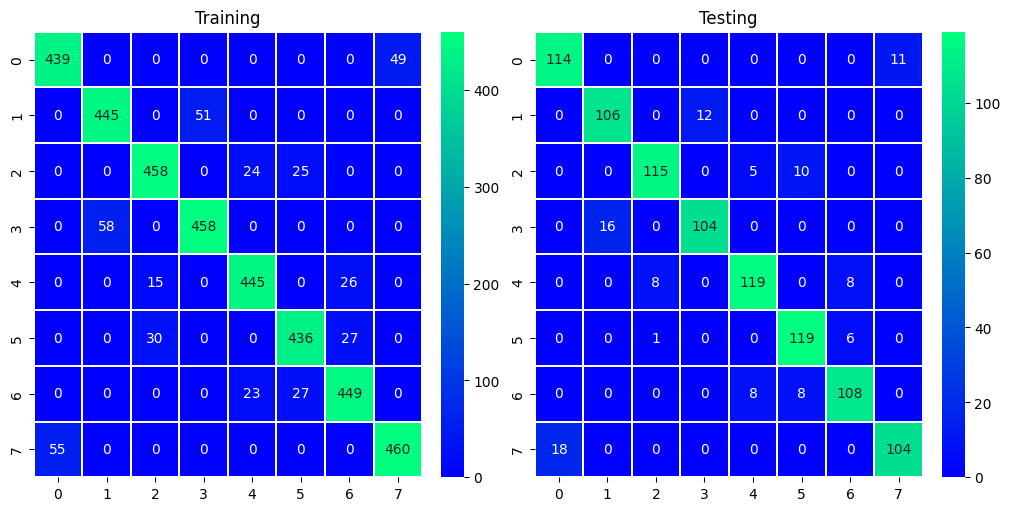

In [7]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))

                                                      precision    recall  f1-score   support

Customer Service Excellence For Basic and Frontliner       0.86      0.91      0.89       125
                         Digital Customer Experience       0.87      0.90      0.88       118
                       Health and Safety Environment       0.93      0.88      0.91       130
                                 ICT Risk Management       0.90      0.87      0.88       120
                      Information Security Awareness       0.90      0.88      0.89       135
                               Persiapan Pra Pensiun       0.87      0.94      0.90       126
                      Production Control With Kanban       0.89      0.87      0.88       124
                       Training Green Belt Six Sigma       0.90      0.85      0.88       122

                                            accuracy                           0.89      1000
                                           macro avg      

In [9]:
a = model.predict_proba(X_test.iloc[-1:, :])
b = ["Customer Service Excellence For Basic and Frontliner", "Digital Customer Experience", 
     "Health and Safety Environment", "ICT Risk Management", "Information Security Awareness",
     "Persiapan Pra Pensiun", "Production Control With Kanban", "Training Green Belt Six Sigma"
     ]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Customer Service Excellence For Basic and Frontliner 1.05%
Digital Customer Experience 11.09%
Health and Safety Environment 1.08%
ICT Risk Management 82.51%
Information Security Awareness 1.04%
Persiapan Pra Pensiun 1.06%
Production Control With Kanban 1.07%
Training Green Belt Six Sigma 1.10%


In [10]:
model.predict(X_test.iloc[-1:, :])

array(['ICT Risk Management'], dtype=object)

In [11]:
y_test.iloc[-1]

'ICT Risk Management'

In [12]:
joblib.dump(model, "./pipeline_save/pipeline8.joblib")

['./pipeline_save/pipeline8.joblib']